# Actividad 3. Aprendizaje competitivo
Gerardo Moreno Zizumbo A01734876

Sofía Ingigerth Cañas Urbina A01173828

Taurino López González		A01284076

**Modificaciones**
* Adición de distancia Manhattan para encontrar el BMU
* Modificación del SOM grid
* Prueba del algoritmo SOM en datos de Iris

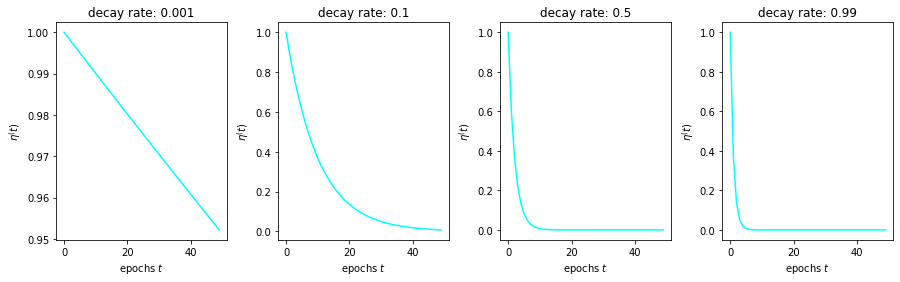

In [ ]:
# Programando un Mapa Auto-organizado (SOM o Red de Kohonen)
# Self-Organizing Maps: Theory and Implementation in Python with NumPy
# https://stackabuse.com/self-organizing-maps-theory-and-implementation-in-python-with-numpy/

# importar algunas bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# decrecimiento de razón de aprendizaje con diferentes razones de decrecimineto
epochs = np.arange(0, 50)
lr_decay = [0.001, 0.1, 0.5, 0.99]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for decay, ind in zip(lr_decay, plt_ind):
    plt.subplot(ind)
    learn_rate = np.exp(-epochs * decay)
    plt.plot(epochs, learn_rate, c='cyan')
    plt.title('decay rate: ' + str(decay))
    plt.xlabel('epochs $t$')
    plt.ylabel('$\eta^(t)$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


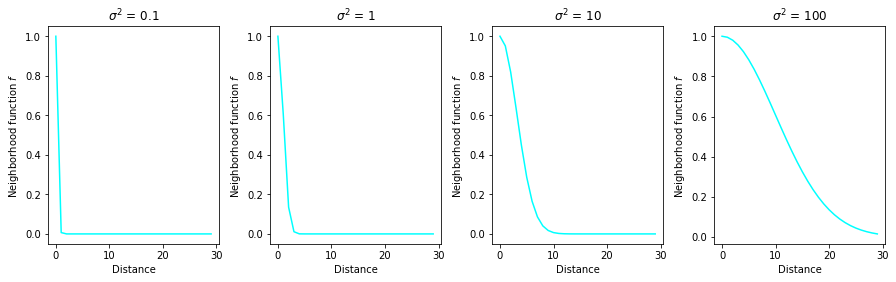

In [ ]:
# efecto del radio en la función de distancia de vecindad
distance = np.arange(0, 30)
sigma_sq = [0.1, 1, 10, 100]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for s, ind in zip(sigma_sq, plt_ind):
    plt.subplot(ind)
    f = np.exp(-distance ** 2 / 2 / s)
    plt.plot(distance, f, c='cyan')
    plt.title('$\sigma^2$ = ' + str(s))
    plt.xlabel('Distance')
    plt.ylabel('Neighborhood function $f$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [ ]:
# Adición de distancia Manhattan
# Return the (g,h) index of the BMU in the grid
def find_BMU(SOM, x, distance):
    if distance == 'euclidean':
        # Distancia Euclideana
        dist = (np.square(SOM - x)).sum(axis=2)
    else:
        # Distancia Manhattan
        dist = np.abs(SOM - x).sum(axis=2)
    
    return np.unravel_index(np.argmin(dist, axis=None), dist.shape)
    
# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    
    g, h = BMU_coord

    #if radius is close to zero then only BMU is changed
    if radius_sq < 1e-3:

        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM

    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):

            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:]) 

    return SOM    

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
             lr_decay = .1, radius_decay = .1, epochs = 10):    

    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex, 'manhattan')
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, radius_sq, (g,h))
            
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)      

    return SOM

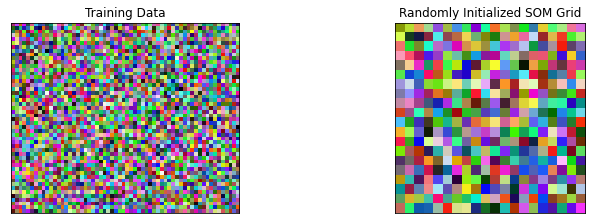

In [ ]:
# EJECUTANDO SOM en un problema práctico

# Dimensions of the SOM grid
# Le cambié de 10x10 a 20x20
m = 20
n = 20

# Number of training examples
n_x = 3000
rand = np.random.RandomState(0)

# Initialize the training data
train_data = rand.randint(0, 255, (n_x, 3))

# Initialize the SOM randomly
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)

# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
img_obj = ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')
plt.show()

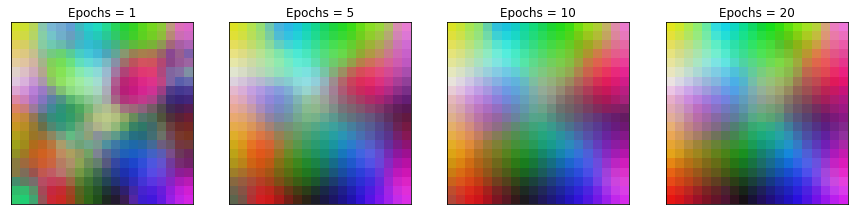

In [ ]:
# Entrena la SOM por 5 épocas
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))

total_epochs = 0

for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))
    
plt.show()

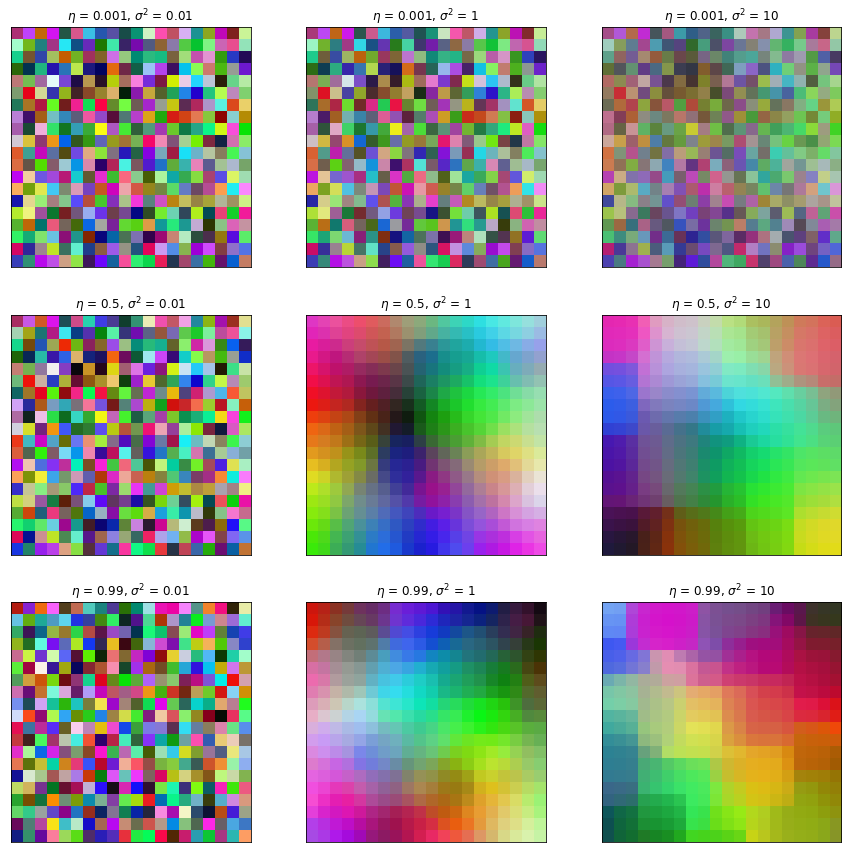

In [ ]:
# Efecto de diferentes razones de aprendizajes y radios en SOM
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15), 
    subplot_kw=dict(xticks=[], yticks=[]))
# Initialize the SOM randomly to the same state
for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        rand = np.random.RandomState(0)
        SOM = rand.randint(0, 255, (m, n, 3)).astype(float)        
        SOM = train_SOM(SOM, train_data, epochs = 5,
                        learn_rate = learn_rate, 
                        radius_sq = radius_sq)
        ax[i][j].imshow(SOM.astype(int))
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) + 
                                ', $\sigma^2$ = ' + str(radius_sq))
plt.show()

## Iris

In [ ]:
import pandas as pd

url_iris = "https://drive.google.com/file/d/1dyCPko4VfNXOpGLDegZ5CFb8xvouMmWz/view?usp=sharing"
url_iris ='https://drive.google.com/uc?id=' + url_iris.split('/')[-2]

iris = pd.read_csv(url_iris, index_col = 0)
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data = iris.drop('Species', axis = 1).to_numpy()
len(iris_data)

150

In [ ]:
m = 20
n = 20
SOM = rand.randint(0, 255, (m, n, 4)).astype(float)
iris_grid = iris_data.reshape(15, 10, 4)

In [ ]:
factor = 255/np.max(iris_grid)
iris_grid = iris_grid * factor

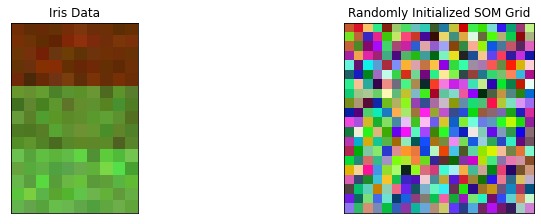

In [ ]:
# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))

ax[0].imshow(iris_grid[:, :, 1:4].astype(int))
ax[0].title.set_text('Iris Data')

img_obj = ax[1].imshow(SOM[:, :, :3].astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')
plt.show()

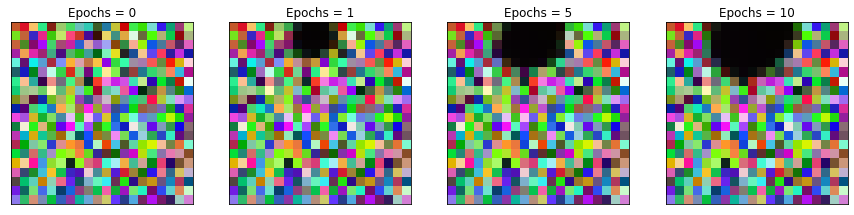

In [ ]:
# Entrena la SOM por 5 épocas
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))

total_epochs = 0

for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    ax[i].imshow(SOM[:, :, :3].astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))
    total_epochs += epochs
    SOM = train_SOM(SOM, iris_data, epochs=epochs)
    
plt.show()

In [ ]:
from random import randrange

In [ ]:
train = [[x for i in range(10)] for x in range(10)]
n_records = len(train)
n_features = len(train[0])

codebook = [train[randrange(n_records)][i] for i in range(n_features)]

In [ ]:
train

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
 [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
 [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
 [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
 [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]]

In [ ]:
codebook

[6, 2, 8, 7, 4, 9, 5, 9, 9, 2]